# Graduate Rational Internship Programme - The Sparks Foundation


*   **Name:** Boda Manoj Kumar
*   **Batch:** GRIPFEB21
*   **Task-3:** Exploratory Data Analysis - Retail.
*   **Dataset:** SampleSuperstore.csv



In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv("/content/SampleSuperstore.csv")

df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


                Postal Code         Sales  Quantity  Discount       Profit
Ship Mode                                                                 
First Class        84229511  3.514284e+05      5693    253.17   48969.8399
Same Day           31242093  1.283631e+05      1960     82.75   15891.7589
Second Class      108192588  4.591936e+05      7423    270.15   57446.6354
Standard Class    327908460  1.358216e+06     22797    955.02  164088.7875
---------------------------------------------------------------------------------------


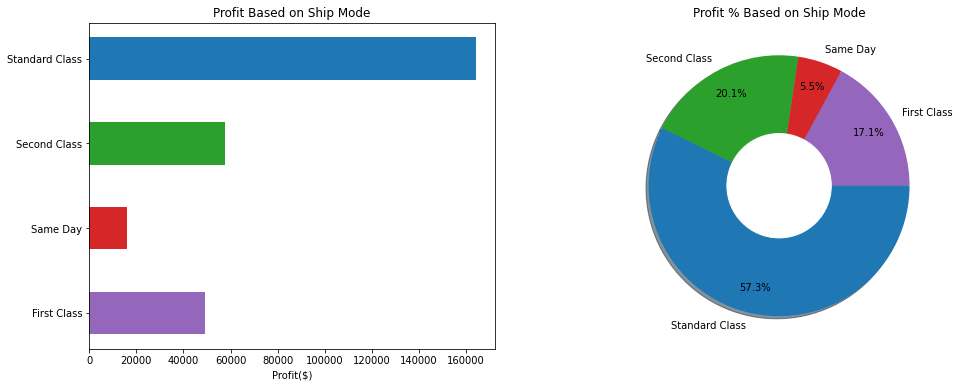

In [39]:
# Which Ship Mode Constitutes to More Profit
df_SM = df.groupby("Ship Mode").sum()
print(df_SM)
print("---------------------------------------------------------------------------------------")
shipmodes = [shipmode for shipmode, x in df.groupby("Ship Mode")]
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title("Profit Based on Ship Mode")
plt.barh(shipmodes, df_SM["Profit"], height=0.5, color=['tab:purple', 'tab:red', 'tab:green', 'tab:blue'])
plt.xlabel("Profit($)")
plt.subplot(1,2,2)
plt.title("Profit % Based on Ship Mode")
plt.pie(df_SM["Profit"], labels=shipmodes, autopct="%1.1f%%", shadow=True, pctdistance=0.8, colors=['tab:purple', 'tab:red', 'tab:green', 'tab:blue'])
circle = plt.Circle(xy = (0, 0), radius = 0.4, color = "White")
plt.gca().add_artist(circle)
plt.show()

***Interpretations:***
1.   *Standard Class accounts to 57.3% of total profit.*
2.   *Same Day accounts to only 5.5% of total profit.*

             Postal Code         Sales  Quantity  Discount       Profit
Segment                                                                
Consumer       288878609  1.161401e+06     19521    820.91  134119.2092
Corporate      164536330  7.061464e+05     11608    477.85   91979.1340
Home Office     98157713  4.296531e+05      6744    262.33   60298.6785
---------------------------------------------------------------------------------------


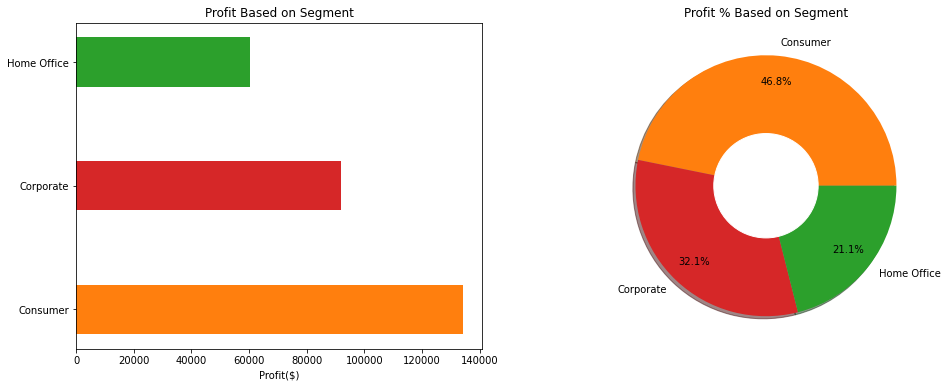

In [40]:
# Which Segment Constitutes to More Profit
df_sg = df.groupby("Segment").sum()
print(df_sg)
print("---------------------------------------------------------------------------------------")
segments = [segment for segment, x in df.groupby("Segment")]

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title("Profit Based on Segment")
plt.barh(segments, df_sg["Profit"], height=0.4, color=['tab:orange', 'tab:red', 'tab:green'])
plt.xlabel("Profit($)")
plt.subplot(1,2,2)
plt.title("Profit % Based on Segment")
plt.pie(df_sg["Profit"], labels=segments, autopct="%1.1f%%", shadow=True, pctdistance=0.8, colors = ['tab:orange', 'tab:red', 'tab:green'])
circle = plt.Circle(xy = (0, 0), radius = 0.4, color = "White")
plt.gca().add_artist(circle)
plt.show()

***Interpretations:***
1.   *Consumer Segment accounts to 46.8% of total profit.*
2.   *Home Office Segment accounts to 21.1% of total profit.*

Top 10 Cities with Highest Profit%......................

                   Profit   Profit %
City                                
New York City  62036.9837  21.661183
Los Angeles    30440.7579  10.628867
Seattle        29156.0967  10.180307
San Francisco  17507.3854   6.112977
Detroit        13181.7908   4.602628
Lafayette      10018.3876   3.498077
Jackson         7581.6828   2.647263
Atlanta         6993.6629   2.441947
Minneapolis     6824.5846   2.382910
San Diego       6377.1960   2.226698
------------------------------------------------------------------


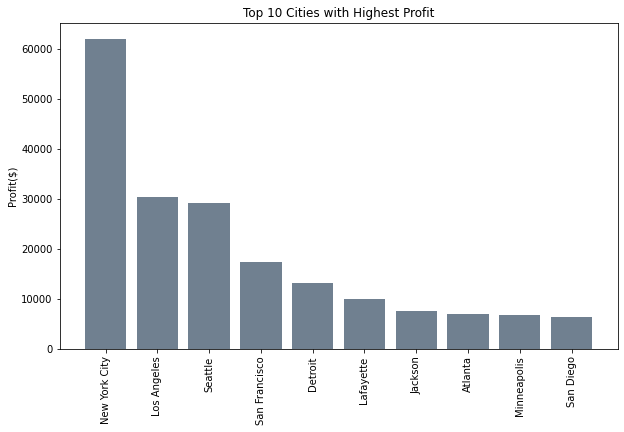

In [41]:
# Which City Constitutes to More Profit
df_city = df.groupby("City").sum()
df_city["Profit %"] = df_city["Profit"] / df_city["Profit"].sum() * 100
df_city = df_city.sort_values(by="Profit", ascending=False)[0:10]
print("Top 10 Cities with Highest Profit%......................")
print()
print(df_city[["Profit", "Profit %"]])
print("------------------------------------------------------------------")
top_cities = [city for city in df_city.index]
plt.figure(figsize=(10,6))
plt.bar(top_cities, df_city["Profit"], color = "slategrey")
plt.title("Top 10 Cities with Highest Profit")
plt.ylabel("Profit($)")
plt.xticks(top_cities, rotation = "vertical")
plt.show()

***Interpretations:***
1.   *New York City accounts to 21.6% of Total Profit.*
2.   *Followed by Los Angeles(10.6%) and Seattle(10.1%).*

                      Postal Code        Sales  ...      Profit   Profit %
State                                           ...                       
California              184382639  457687.6315  ...  76381.3871  26.669756
New York                 11835721  310876.2710  ...  74038.5486  25.851717
Washington               49661687  138641.2700  ...  33402.6517  11.663058
Michigan                 12356103   76269.6140  ...  24463.1876   8.541705
Virginia                  5124335   70636.7200  ...  18597.9504   6.493765
Indiana                   6991602   53555.3600  ...  18382.9363   6.418690
Georgia                   5685480   49095.8400  ...  16250.0433   5.673957
Kentucky                  5725336   36591.7500  ...  11199.6966   3.910549
Minnesota                 4932224   29863.1500  ...  10823.1874   3.779085
Delaware                  1896504   27451.0690  ...   9977.3748   3.483756
New Jersey                1007934   35764.3120  ...   9772.9138   3.412366
Wisconsin                

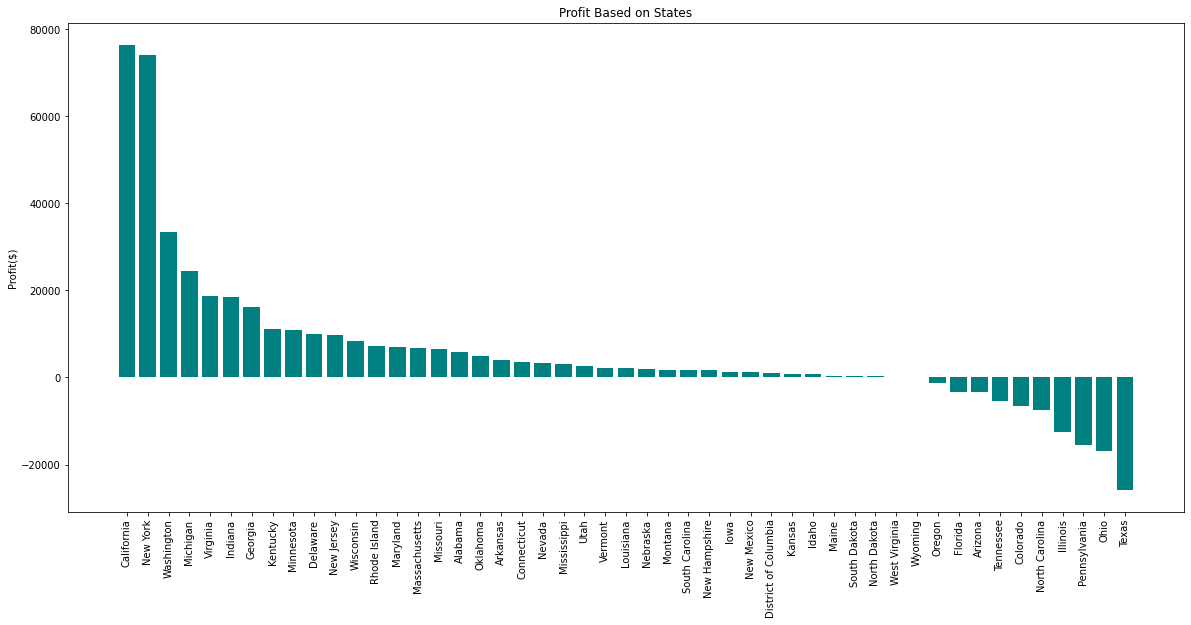

In [42]:
# Which State Constitutes to More Profit
df_st = df.groupby("State").sum()
df_st["Profit %"] = df_st["Profit"] / df_st["Profit"].sum() * 100
print(df_st.sort_values(by = "Profit %", ascending = False))
print("---------------------------------------------------------------------------------------")
states = [state for state in df_st.sort_values(by = "Profit %", ascending = False).index]
plt.figure(figsize=(20,9))
plt.title("Profit Based on States")
plt.bar(states, df_st["Profit"].sort_values(ascending = False), color = "teal")
plt.ylabel("Profit($)")
plt.xticks(states, rotation = "vertical")
plt.show()

***Interpretations:***
1.   *California accounts to 26.6% of Total Profit.*
2.   *Followed by New York(25.85) and Washington(11.6%).*

         Postal Code        Sales  Quantity  Discount       Profit
Region                                                            
Central    151786150  501239.8908      8780    558.34   39706.3625
East        50171698  678781.2400     10618    414.00   91522.7800
South       55875052  391721.9050      6209    238.55   46749.4303
West       293739752  725457.8245     12266    350.20  108418.4489
---------------------------------------------------------------------------------------


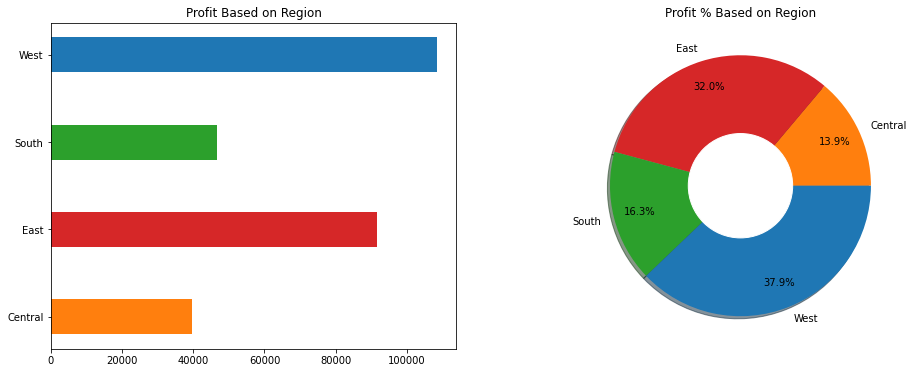

In [43]:
# Which Region Constitutes to More Profit
df_rg = df.groupby("Region").sum()
print(df_rg)
print("---------------------------------------------------------------------------------------")
regions = [region for region, x in df.groupby("Region")]
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title("Profit Based on Region")
plt.barh(regions, df_rg["Profit"], height=0.4, color = ['tab:orange', 'tab:red', 'tab:green', 'tab:blue'])
plt.subplot(1,2,2)
plt.title("Profit % Based on Region")
plt.pie(df_rg["Profit"], labels=regions, autopct="%1.1f%%", shadow=True, pctdistance=0.8, colors = ['tab:orange', 'tab:red', 'tab:green', 'tab:blue'])
circle = plt.Circle(xy = (0, 0), radius = 0.4, color = "White")
plt.gca().add_artist(circle)
plt.show()

***Interpretations:***
1.   *West Region accounts for 37.9% of Total Profit*
2.   *Followed by East(32.0%), South(16.3%), Central(13.9%)*

                 Postal Code        Sales  Quantity  Discount       Profit
Category                                                                  
Furniture          118196026  741999.7953      8028    368.89   18451.2728
Office Supplies    330772872  719047.0320     22906    947.80  122490.8008
Technology         102603754  836154.0330      6939    244.40  145454.9481
---------------------------------------------------------------------------------------


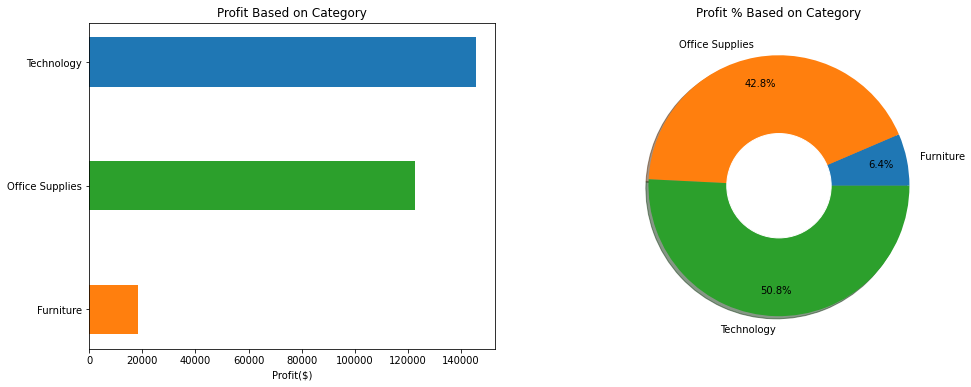

In [49]:
# Which Category Constitutes to More Profit
df_cat = df.groupby("Category").sum()
print(df_cat)
print("---------------------------------------------------------------------------------------")
categories = [category for category, x in df.groupby("Category")]
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title("Profit Based on Category")
plt.barh(categories, df_cat["Profit"], height=0.4, color = ['tab:orange', 'tab:green', 'tab:blue'])
plt.xlabel("Profit($)")
plt.subplot(1,2,2)
plt.title("Profit % Based on Category")
plt.pie(df_cat["Profit"], labels=categories, autopct="%1.1f%%", shadow=True, pctdistance=0.8)
circle = plt.Circle(xy = (0, 0), radius = 0.4, color = "White")
plt.gca().add_artist(circle)
plt.show()

***Interpretations:***
1.   *Technology contributes more to profit i.e. 50.8% of total profit.*
2.   *Followed by Office Supplies(42.8%) and Furniture(6.4%)*

              Postal Code        Sales  ...      Profit   Profit %
Sub-Category                            ...                       
Copiers           3873477  149528.0300  ...  55617.8249  19.419834
Phones           47897175  330007.0540  ...  44515.7306  15.543364
Accessories      44468434  167380.3180  ...  41936.6357  14.642832
Paper            76299221   78479.2060  ...  34053.5693  11.890336
Binders          83626398  203412.7330  ...  30221.7633  10.552401
Chairs           34936229  328449.1030  ...  26590.1663   9.284372
Storage          46248720  223843.6080  ...  21278.8264   7.429835
Appliances       25250538  107532.1610  ...  18138.0054   6.333168
Furnishings      51880430   91705.1640  ...  13059.1436   4.559804
Envelopes        13325731   16476.4020  ...   6964.1767   2.431651
Art              43329658   27118.7920  ...   6527.7870   2.279279
Labels           19552985   12486.3120  ...   5546.2540   1.936561
Machines          6364668  189238.6310  ...   3384.7569   1.18

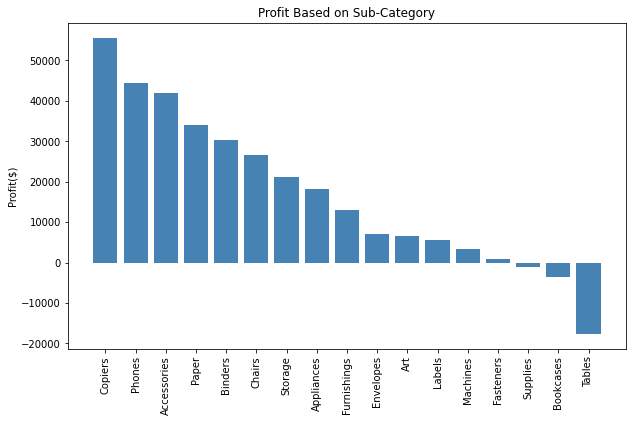

In [50]:
# Which Sub-Category Constitutes to More Profit
df_scat = df.groupby("Sub-Category").sum()
df_scat["Profit %"] = df_scat["Profit"] / df_scat["Profit"].sum() * 100
print(df_scat.sort_values(by = "Profit %", ascending = False))
print("---------------------------------------------------------------------------------------")
sub_categories = [sub_category for sub_category in df_scat.sort_values(by = "Profit %", ascending = False).index]
plt.figure(figsize=(10,6))
plt.title("Profit Based on Sub-Category")
plt.bar(sub_categories, df_scat["Profit"].sort_values(ascending = False), color = "steelblue")
plt.ylabel("Profit($)")
plt.xticks(sub_categories, rotation = "vertical")
plt.show()

***Interpretations:***
1.   *Top 3 Sub-Categories with high profits are Copiers(19.41%), Phones(15.54%), Accessories(14.64%).*
2.   *Followed by Office Supplies(42.8%) and Furniture(6.4%).*

In [54]:
# Profit Based on Region and Category
RC = df.groupby(["Region", "Category"]).sum()

RC

Postal Code        Sales  ...  Discount      Profit
Region  Category                                   ...                      
Central Furniture           31498984  163797.1638  ...    143.04  -2871.0494
        Office Supplies     92822095  167026.4150  ...    359.40   8879.9799
        Technology          27465071  170416.3120  ...     55.90  33697.4320
East    Furniture           10407666  208291.2040  ...     92.60   3046.1658
        Office Supplies     29791451  205516.0550  ...    244.70  41014.5791
        Technology           9972581  264973.9810  ...     76.70  47462.0351
South   Furniture           11471303  117298.6840  ...     40.35   6771.2061
        Office Supplies     34072173  125651.3130  ...    166.60  19986.3928
        Technology          10331576  148771.9080  ...     31.60  19991.8314
West    Furniture           64818073  252612.7435  ...     92.90  11504.9503
        Office Supplies    174087153  220853.2490  ...    177.10  52609.8490
        Technology          54834526  251991.8320  ...     80.20  44303.6496

[12 rows x 5 columns]

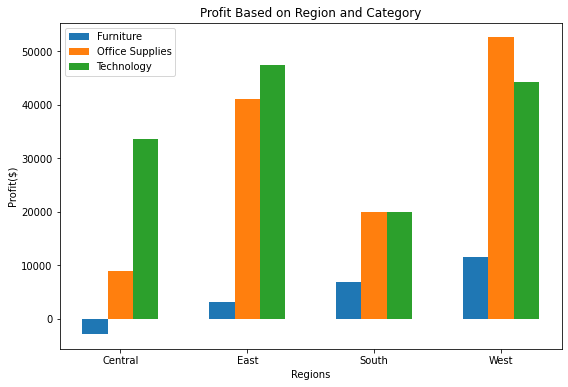

In [86]:
furniture = [RC["Profit"][i] for i in range(0, len(RC.Profit), 3)]
office_supplies = [RC["Profit"][i] for i in range(1, len(RC.Profit), 3)]
technology = [RC["Profit"][i] for i in range(2, len(RC.Profit), 3)]

width = 0.4
bar1 = np.arange(0,8,2)
bar2 = bar1 + width
bar3 = bar2 + width
plt.figure(figsize=(9,6))
plt.title("Profit Based on Region and Category")
plt.bar(bar1, furniture, width = width, label = "Furniture")
plt.bar(bar2, office_supplies, width = width, label = "Office Supplies")
plt.bar(bar3, technology, width = width, label = "Technology")
plt.xlabel("Regions")
plt.ylabel("Profit($)")
plt.xticks(bar2, regions)
plt.legend()
plt.show()

***Interpretations:***
1.   *In Central Region, Furniture is in loss.*
2.   *Technology is doing well in every Region.*
3.   *Office Supplies is doing decent job too.*
4.   *Suprisingly, in West Region, Office Supplies is in more profit than Technology.*